# K-Means Clustering
K-Means Clustering is an unsupervised learning algorithm for data grouping. In image segmen-
tation, it can be applied to partition image pixels into different groups based on the associated pixel
values or features. In this problem, you will learn how to segment the provided image by using
K-means clustering.
https://github.com/muthuspark/ml_research

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread, imsave
from tqdm.notebook import tqdm

n_colors_list = [2, 4, 8, 16, 32]
n_colors_list = [2, 4]


columns = len(n_colors_list)
rows = 1

## Clustering by (R, G, B)

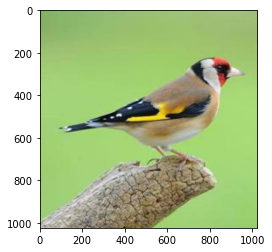

In [27]:
sample_img = imread('material/bird.jpg')
plt.imshow(sample_img)
w,h,_ = sample_img.shape
sample_img = sample_img.reshape(w*h,3)

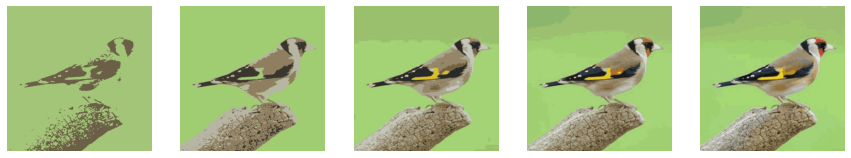

In [29]:
fig, axs = plt.subplots(rows, columns,figsize=(15,15))
for i in tqdm(range(columns*rows)):
    
    n_colors = n_colors_list[i]
    
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(sample_img)
    
    # find out which cluster each pixel belongs to.
    labels = kmeans.predict(sample_img)
    
    # the cluster centroids is our color palette
    identified_palette = np.array(kmeans.cluster_centers_).astype(int)
    
    # recolor the entire image
    recolored_img = np.copy(sample_img)
    for index in range(len(recolored_img)):
        recolored_img[index] = identified_palette[labels[index]]

    # reshape for display
    recolored_img = recolored_img.reshape(w,h,3)

    #imsave('kmeans_color_q.jpg', recolored_img)
    #fig.add_subplot(rows, columns, i)
    axs[i].imshow(recolored_img)
    axs[i].axis('off')
plt.show()

## Clustering by (R, G, B, X, Y)

(1024, 1024, 3)
[129 175 100]
(1024, 1024, 3)
[129 175 100]


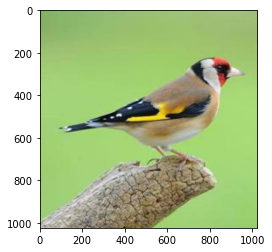

In [110]:
sample_img = imread('material/bird.jpg')
#plt.imshow(sample_img)
print(sample_img.shape)
w,h,_ = sample_img.shape
print(sample_img[10, 10, :])
sample_img_xy = np.zeros((w, h, 3))
print(sample_img_xy.shape)
sample_img_xy[:, :, :3] = sample_img
print(sample_img_xy[10, 10, :].astype(np.int))
plt.imshow(sample_img_xy.astype(np.int))
#sample_img_xy = sample_img
#sample_img_xy[:, :, 3] = np.ones((w, h))*np.expand_dims(np.array(range(w)), axis=0)/w
#sample_img_xy[:, :, 4] = np.ones((w, h))*np.expand_dims(np.array(range(w)), axis=1)/h

sample_img_xy = sample_img_xy.reshape(w*h,3).astype(np.int)



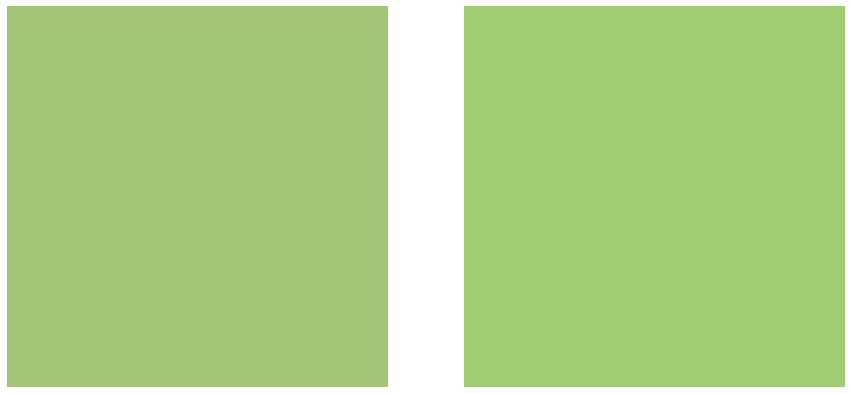

In [107]:
fig, axs = plt.subplots(rows, columns,figsize=(15,15))
for i in tqdm(range(columns*rows)):
    
    n_colors = n_colors_list[i]
    
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(sample_img_xy)
    
    # find out which cluster each pixel belongs to.
    labels = kmeans.predict(sample_img_xy)
    
    # the cluster centroids is our color palette
    identified_palette = np.array(kmeans.cluster_centers_).astype(int)

    
    # recolor the entire image
    recolored_img = np.copy(sample_img)
    for index in range(len(recolored_img)):
        recolored_img[index] = identified_palette[labels[index]]

    # reshape for display
    recolored_img = recolored_img.reshape(w,h,3)

    #imsave('kmeans_color_q.jpg', recolored_img)
    #fig.add_subplot(rows, columns, i)
    axs[i].imshow(recolored_img)
    axs[i].axis('off')
plt.show()